<a href="https://colab.research.google.com/github/yashj1301/Python3-UpGrad-UMich/blob/master/Python%203.x/Upgrad/Projects/Project%203%20-%20Lending%20Risk%20Analytics/Loan_Risk_Analytics_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Default Analysis (By Yash Jain)

### Business Understanding - You work for a consumer finance company that specialises in providing various types of loans to urban customers. When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

2. If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to financial loss for the company.

### Problem Statement - The company wants to understand the driving factors (or driver variables) behind loan default, i.e., the variables which are strong indicators of default.

There are 3 categories, when a loan is accepted for a consumer - 

1. <u>Fully paid</u>: The applicant has fully paid the loan (the principal and the interest amount).
2. <u>Current</u>: The applicant is in the process of paying the instalments, i.e., the tenure of the loan is not yet completed. These candidates are not labelled as ‘defaulted’.
3. <u>Charged-off / Defaulted </u>: The applicant has not paid the instalments in due time for a long period, i.e., they have defaulted on the loan.

First, let us import all the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as cb
import warnings as warn

warn.filterwarnings('ignore')

## Data Understanding

First, let us import the dataset. Then, we will check the information and description for it.

In [ ]:
loan_data = pd.read_csv("loan.csv", sep=",")
display(loan_data.info(),loan_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


None

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


There are `87` numeric columns in our dataset, and the statistics for them are given above. Now, let us look at the shape of the dataset.

In [ ]:
orig = loan_data.shape
orig

(39717, 111)

There are `39717` rows in our dataset, and `111` columns. Now, let us look at the names of the columns.


In [ ]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Some of the important columns in the dataset are 

<li><code>loan_amount</code> </li>
<li><code>term</code></li> 
<li><code>interest rate</code></li> 
<li><code>grade</code></li> 
<li><code>sub grade</code></li> 
<li><code>annual income</code></li> 
<li><code>purpose of the loan</code></li> 

etc. Our target variable is __`loan_status`__. Now, let us move ahead, and look at the first few and last few rows of the dataset.

In [ ]:
display(loan_data.head(5),loan_data.tail(5))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we will move towards data cleaning and preparation.

# Data Cleaning and Preparation

From the above output, we can see that there are some columns containing null values. Let us see how many null values are there in each column.

In [ ]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

It is clearly visible that there are some columns that have 100% null values. Hence, let us find out the __percentages of null__ values in each column.

In [ ]:
null_perc = round(loan_data.isnull().sum()/orig[0], 2)*100
null_perc

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

We can see that many columns have 100% missing values, whereas some have null values between 30-90% range. 

First, let's get rid of the columns having 100% missing values.

In [ ]:
no_val = null_perc[null_perc==100].index
no_val.shape[0]

54

We can see there are many columns that have 100% null values. Let us drop these columns, since they are insignificant in our analysis.

In [ ]:
loan = loan_data[list(set(loan_data.columns) - set(no_val))]
loan.shape

(39717, 57)

Hence, we have 57 columns left out of 111 columns. Now, let us see the percentage of null values again.

In [ ]:
null_perc = round((loan.isnull().sum()/loan.shape[0])*100,2)
null_perc

recoveries                     0.00
dti                            0.00
application_type               0.00
delinq_2yrs                    0.00
open_acc                       0.00
emp_title                      6.19
mths_since_last_delinq        64.66
chargeoff_within_12_mths       0.14
purpose                        0.00
annual_inc                     0.00
last_credit_pull_d             0.01
total_rec_late_fee             0.00
total_pymnt_inv                0.00
pub_rec_bankruptcies           1.75
next_pymnt_d                  97.13
policy_code                    0.00
last_pymnt_d                   0.18
id                             0.00
initial_list_status            0.00
term                           0.00
desc                          32.58
earliest_cr_line               0.00
grade                          0.00
verification_status            0.00
delinq_amnt                    0.00
pymnt_plan                     0.00
revol_util                     0.13
addr_state                  

We can see that there are still columns that have more than 60% null values. Let us drop all those columns as well. 

In [ ]:
mt60null = null_perc[null_perc >=60].index
mt60null

Index(['mths_since_last_delinq', 'next_pymnt_d', 'mths_since_last_record'], dtype='object')

In [ ]:
loan = loan[list(set(loan.columns) - set(mt60null))]
loan.shape

(39717, 54)

Now, let us see the null values percentage again, this time in descending order.

In [ ]:
null_perc = round((loan.isnull().sum()/loan.shape[0])*100,2).sort_values(ascending=False)
null_perc

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
collection_recovery_fee        0.00
funded_amnt_inv                0.00
sub_grade                      0.00
acc_now_delinq                 0.00
zip_code                       0.00
int_rate                       0.00
last_pymnt_amnt                0.00
recoveries                     0.00
total_rec_prncp                0.00
url                            0.00
funded_amnt                    0.00
total_pymnt                    0.00
loan_status                    0.00
inq_last_6mths                 0.00
out_prncp_inv                  0.00
loan_amnt                      0.00
total_acc                   

There is just one column `desc` which has significant null values. Let us see what it contains. 

In [ ]:
loan[['desc']].head(10)

,desc
0,Borrower added on 12/22/11 > I need to upgra...
1,Borrower added on 12/22/11 > I plan to use t...
2,NaN
3,Borrower added on 12/21/11 > to pay for prop...
4,Borrower added on 12/21/11 > I plan on combi...
5,NaN
6,Borrower added on 12/18/11 > I am planning o...
7,Borrower added on 12/16/11 > Downpayment for...
8,Borrower added on 12/21/11 > I own a small h...
9,Borrower added on 12/16/11 > I'm trying to b...


This column contains the comments written by the applicant while applying for the loan. But, since we do not know how to do text analysis, it is better to drop this column.

In [ ]:
loan.drop('desc',axis=1,inplace=True)
loan.shape

(39717, 53)

Now, let us check for null value percentages again.

In [ ]:
null_perc = round((loan.isnull().sum()/loan.shape[0])*100,2).sort_values(ascending=False)
null_perc[null_perc!=0]

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64

Hence, there are very small percentages of null values in the dataset. We won't be imputing them as of now.

There are final 39717 rows and 53 columns. Let us see how many columns we have lost. 

In [ ]:
round((1-loan.shape[1]/loan_data.shape[1])*100,3)

52.252

So, we have lost more than half of our columns by dealing with null values. Now, let us move on to rows. Let us see if there are any null values in our rows. 


In [ ]:
loan.isnull().sum(axis=1).sort_values(ascending=False)

39706    5
39715    5
39714    5
39660    5
39659    5
        ..
15371    0
15370    0
15369    0
15368    0
19858    0
Length: 39717, dtype: int64

Let us find the percentage values for null values in this case as well. Let us see. 

In [ ]:
row_null_perc = round((loan.isnull().sum(axis=1)/loan.shape[1])*100,3).sort_values(ascending=False)
row_null_perc

39706    9.434
39715    9.434
39714    9.434
39660    9.434
39659    9.434
         ...  
15371    0.000
15370    0.000
15369    0.000
15368    0.000
19858    0.000
Length: 39717, dtype: float64

We can see that there are just around maximum 9.4% of null values for rows. Again, not so significant. Now, let us move ahead to data preparation.

First, let us see the information of our dataset.

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   recoveries                  39717 non-null  float64
 1   dti                         39717 non-null  float64
 2   open_acc                    39717 non-null  int64  
 3   application_type            39717 non-null  object 
 4   delinq_2yrs                 39717 non-null  int64  
 5   emp_title                   37258 non-null  object 
 6   chargeoff_within_12_mths    39661 non-null  float64
 7   purpose                     39717 non-null  object 
 8   annual_inc                  39717 non-null  float64
 9   last_credit_pull_d          39715 non-null  object 
 10  total_rec_late_fee          39717 non-null  float64
 11  total_pymnt_inv             39717 non-null  float64
 12  home_ownership              39717 non-null  object 
 13  pub_rec_bankruptcies        390

The column `int_rate`, short for interest rate, has been assigned as object type. Let us see it first.

In [ ]:
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

Due to the % sign, it is imported as a string type. Hence, let us change it to float type. 

In [ ]:
loan['int_rate']=loan['int_rate'].str.strip('%').astype(float)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   recoveries                  39717 non-null  float64
 1   dti                         39717 non-null  float64
 2   open_acc                    39717 non-null  int64  
 3   application_type            39717 non-null  object 
 4   delinq_2yrs                 39717 non-null  int64  
 5   emp_title                   37258 non-null  object 
 6   chargeoff_within_12_mths    39661 non-null  float64
 7   purpose                     39717 non-null  object 
 8   annual_inc                  39717 non-null  float64
 9   last_credit_pull_d          39715 non-null  object 
 10  total_rec_late_fee          39717 non-null  float64
 11  total_pymnt_inv             39717 non-null  float64
 12  home_ownership              39717 non-null  object 
 13  pub_rec_bankruptcies        390

Now, let us move to another column, the `emp_length` column. Let us see what it contains. 

In [ ]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We can see that it is a categorical data. However, we can easily convert it into ratio data using the following scheme - 

1. <1 year - 0
2. 1 year - 1
3. 2 year - 2  
.  
.  
.  
11. 10+ years - 10

Before doing this, let us drop the null values from this column. Let us test this before applying it. 

In [ ]:
x = loan['emp_length'].copy().dropna()
x

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38642, dtype: object

In [ ]:
new = x.apply(lambda y: y.strip('years').strip('+ ').replace('< 1','0')).astype(int)
new.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

Great. Now, let us apply this method to our original dataframe. 

In [ ]:
loan.dropna(how='all',axis=0,subset=['emp_length'],inplace=True)
loan['emp_length'] = loan['emp_length'].apply(lambda y: y.strip('years').strip('+ ').replace('< 1','0')).astype(int)
loan['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

Perfect ! We have modified the column. Now, let us look at the dataset information again.

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   recoveries                  38642 non-null  float64
 1   dti                         38642 non-null  float64
 2   open_acc                    38642 non-null  int64  
 3   application_type            38642 non-null  object 
 4   delinq_2yrs                 38642 non-null  int64  
 5   emp_title                   37202 non-null  object 
 6   chargeoff_within_12_mths    38586 non-null  float64
 7   purpose                     38642 non-null  object 
 8   annual_inc                  38642 non-null  float64
 9   last_credit_pull_d          38640 non-null  object 
 10  total_rec_late_fee          38642 non-null  float64
 11  total_pymnt_inv             38642 non-null  float64
 12  home_ownership              38642 non-null  object 
 13  pub_rec_bankruptcies        379

# Data Analysis

Let's now move to data analysis. To start with, let us understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. 

__Objective__: The objective is to identify the attributes that will influence whether a loan application is rejected or accepted. 

To accomplish this objective, there can be 2 types of attributes - 

1. Demographics (Age, Gender, Occupation etc)
2. Loan Specific (Amount, Interest Rate, Tenure etc)

We will perform an EDA for these two types of variables. Let us define the different attributes in each category.


In [ ]:
demographics = ['id','member_id','emp_title','emp_length','home_ownership','annual_inc','verification_status',
                'dti','addr_state','acc_now_delinq','delinq_amnt',
                'pub_rec_bankruptcies','tax_liens']

loan_specs = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment', 'grade', 
              'sub_grade', 'issue_d','loan_status','pymnt_plan','purpose',
              'last_credit_pull_d','initial_list_status']

print('Demographics:',len(demographics))
print('Loan Specific:',len(loan_specs))

Demographics: 13
Loan Specific: 14


In [ ]:
loan_demo = loan.loc[:,demographics]
loan_ls = loan.loc[:,loan_specs]

Hence, we have listed 27 total attributes that would influence whether the loan would be rejected or accepted. Let us start working on them. First, we will study the target column - __`loan_status`__. Let us understand it. 

In [ ]:
loan_ls[['loan_status']].describe()

,loan_status
count,38642
unique,3
top,Fully Paid
freq,32145


We can see that it is a categorical variable, having 3 unique values. Let us now list the unique values. 

In [ ]:
loan_ls['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

As per the information provided to us, we only need the entries where the customer has either defaulted (charged off) or fully paid. Hence, let us drop the values containing `current` as loan status.

In [ ]:
loan_ = loan[loan['loan_status']!='Current']
loan_['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

Now, let us assign ordinal values to these two unique values - 0 means defaulted (charged off), and 1 means fully paid.

In [ ]:
loan_['loan_status'] = loan_['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)
loan_['loan_status'].value_counts()

1    32145
0     5399
Name: loan_status, dtype: int64

We can see that most borrowers have fully paid their loans. Let us see the percentage as well.

In [ ]:
round((loan_['loan_status'].value_counts()/loan_['loan_status'].value_counts().sum())*100,3)

1    85.62
0    14.38
Name: loan_status, dtype: float64

Around 85.6% of borrowers have fully paid their loans. Hence, our Default rate comes out to be around 14.4%. Now, let us start with some univariate analysis.

## Univariate Analysis

Let's first visualise the average default rates across categorical variables. We will be starting with the demographic variables. For the categorical variables, we will define a function to show the average default rates across each category.

### Demographics

In [ ]:
def avg_plot(cat):
  df = round((1 - loan_.groupby(cat).mean()[['loan_status']])*100,2)
  plot.subplots(figsize=(16,6))
  plot.title('Average Loan Status Defaulter across '+cat)
  cb.barplot(x =df.index, y = 'loan_status', data = df)
  plot.show()

To plot the loan status with the numeric variables, we will use the boxplots. Hence, let us define a function for that as well. 

In [ ]:
def num_plot(var):
  plot.subplots(figsize=(7,5))
  plot.title('Box Plot of '+var+' vs Loan Status')
  cb.boxplot(x = 'loan_status',y = var, data = loan_)
  plot.grid()

1. Average Default Rates across employment length.

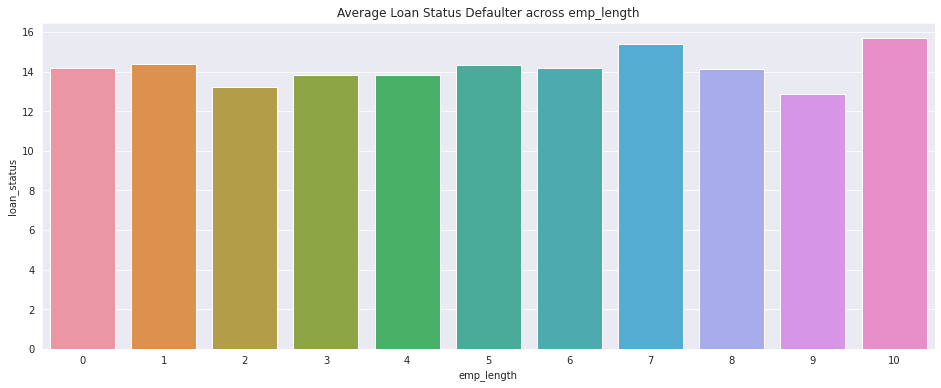

In [ ]:
avg_plot('emp_length')

The average loan defaulters have been more or less the same in case of all employment lengths. There is not much to see here. Hence, <font color='red'>this factor affects the defaulter status very slightly</font>. 

2. Average Defaulters across Home Ownership

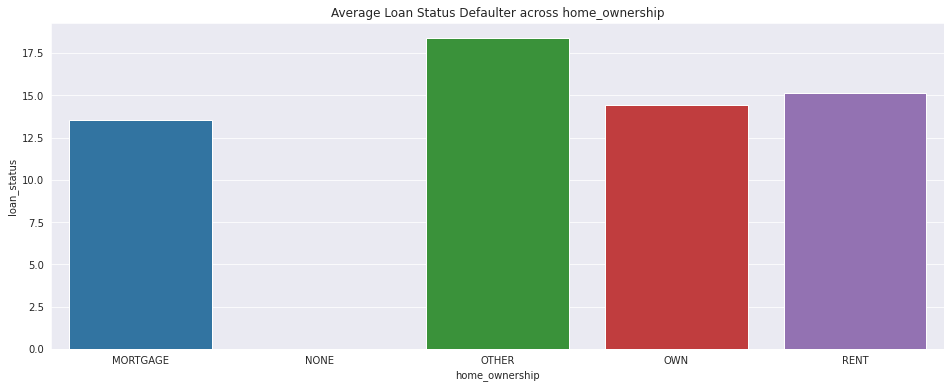

In [ ]:
avg_plot('home_ownership')

We can see that on an average, the most defaulters are in the category of OTHERS, whereas the other 3 stand pretty equivalent between 12.5 and 15. But still, it is not a great parameter influencing the defaulters.

3. Average Defaulters across Verification Status

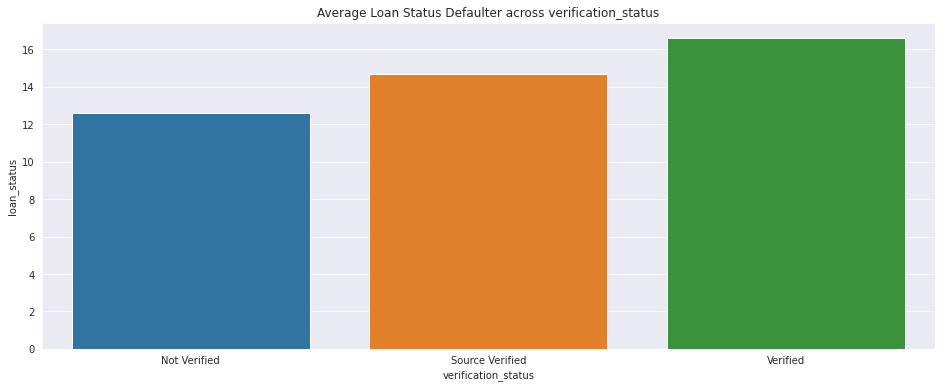

In [ ]:
avg_plot('verification_status')

Similar to the Grade, the Average Loan deaulters increase as we move from Not Verified to the Verified categories. Hence, it <font color = 'red'> is also affecting the defaulters positively.</font>

4. Distribution of DTI across both the loan statuses


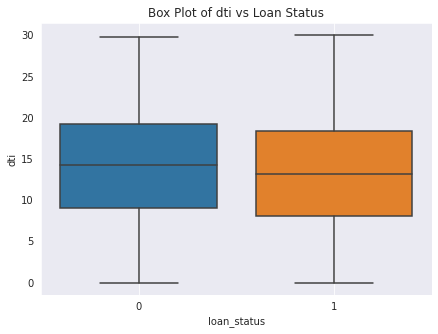

In [ ]:
num_plot('dti')

While the highest and lowest values are the same, for the defaulters, most values of DTI lie between around 8 to 19. Hence, <font color = 'red'> this factor is also affecting the defaulters significantly</font>. 

This clearly means that people having higher expenses than income are more likely to become defaulters.

5. Relation between the Loan Status and the Public Bankruptcy Records

In [ ]:
loan_[['pub_rec_bankruptcies','loan_status']].pivot_table(index = 'pub_rec_bankruptcies', columns = 'loan_status', 
                  aggfunc = np.size)

loan_status,0,1
pub_rec_bankruptcies,,
0.0,9888,60736
1.0,670,2390
2.0,4,6


It is visible that there is a significant difference between the number of defaulters for each public bankruptcy records count. It has an <font color='red'> inverse relationship </font> woth the loan status. 

In [ ]:
loan_['delinq_amnt'].value_counts()

0    37544
Name: delinq_amnt, dtype: int64

### Loan Specifications 

Here, the first thing we will do, is visualize the categorical variables with the defaulters. Let us do it now. 

1. Average Defaulters across various Tenures (Terms of Loan)

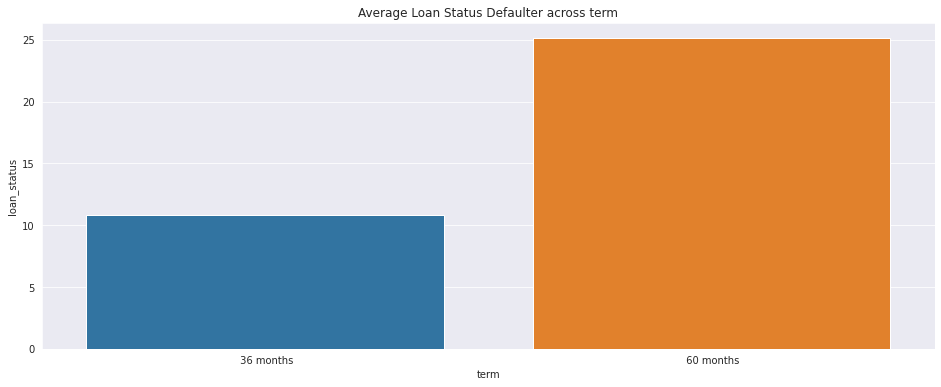

In [ ]:
avg_plot('term')

From the little data that we have, as the term increases, the number of defaulters also increase. Hence, it has a <font color='red'> positive relationship </font> with the defaulters. 

2. Average Defaulters across various Sub Grades

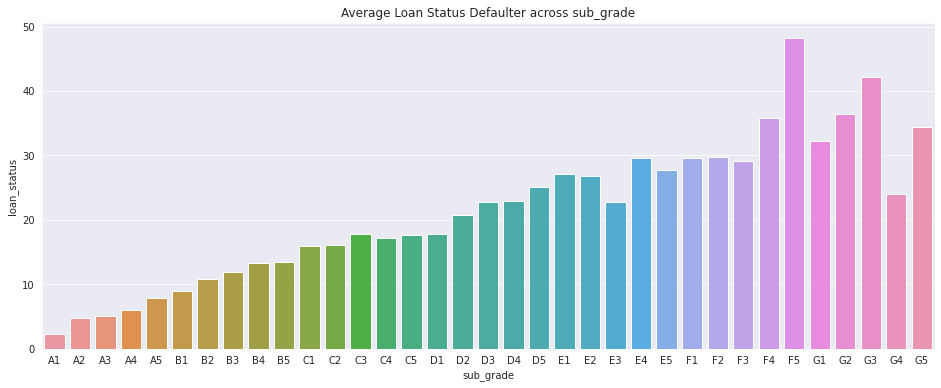

In [ ]:
avg_plot('sub_grade')

It can be noticed that apart from a few bars, the graph is going upwards, which means that as you move from A1 to G5, the number of defaulters increase. Hence, it has a <font color='red'>near positive effect</font> on the defaulters.

4. Average Defaulters across Grade

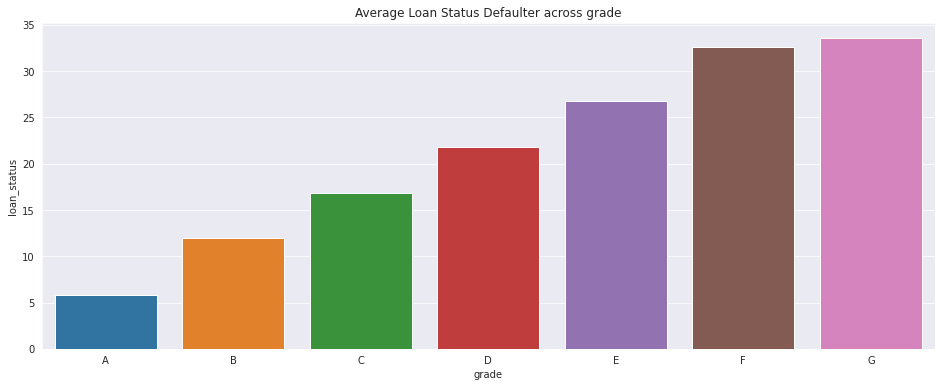

In [ ]:
avg_plot('grade')

Here, it is clearly visible that as the grade moves from A to G, the average defaulters also increase. Hence, <font color = 'red'>this factor affects the defaulter rate positively. 

3. Average Defaulters across various Purposes

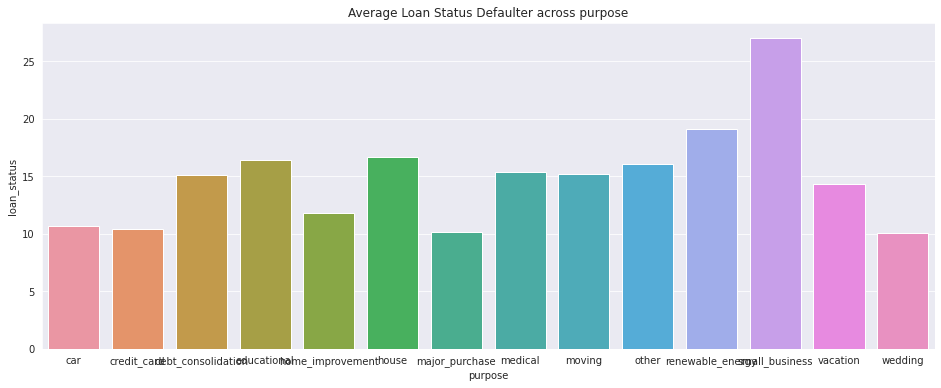

In [ ]:
avg_plot('purpose')

We can see that the most defaulters belong to the category of small businesses, followed by renewable energy, house and education. 

4. Loan Status by distribution of Loan Amount

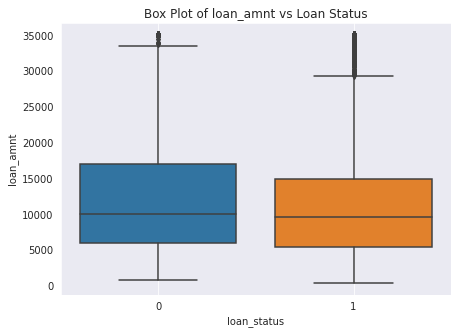

In [ ]:
num_plot('loan_amnt')

Here, it is quite visible that the IQR of defaulters is more than fully paid borrowers. Hence, as the loan amount increases, it can be seen that the defaulters also increase. This demonstrates a <font color="red">positive effect</font> on the defaulters.

5. Loan status based on funded amount

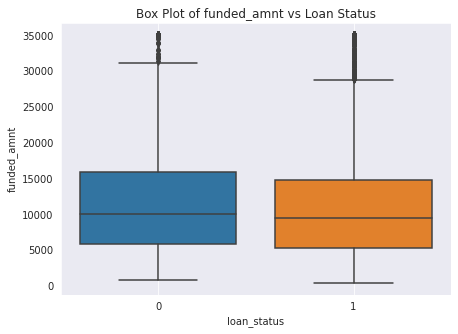

In [ ]:
num_plot('funded_amnt')

This factor also contributes to the defaulters in the manner similar to the loan amount parameter. This may be due to the reason that most loans are 100% funded, without down payments.

Let us find the percentages of funded loan amounts here.

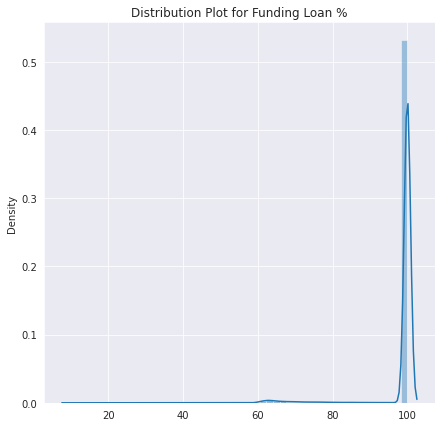

In [ ]:
percentfund = (loan_['funded_amnt']/loan_['loan_amnt'])*100
plot.subplots(figsize=(7,7))
plot.title('Distribution Plot for Funding Loan %')
cb.distplot(percentfund)
plot.show()

It is clearly visible that most of the loans are funded 100% or near to 100%. Hence, funding amount is not an influential factor here. 

6. Loan Status based on Interest Rate

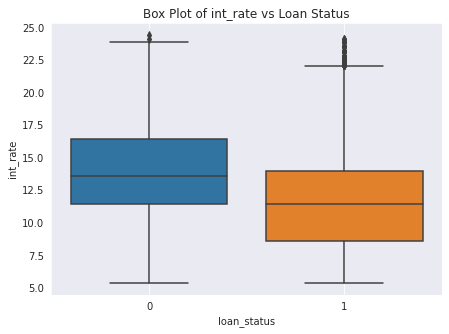

In [ ]:
num_plot('int_rate')

It is clearly visible that the defaulters lie within a higher interest rate (IQR between around 12 to 16). Hence, <font color='red'>this factor affects the defaulters positively</font>. 

7. Loan Status based on Installment Amount

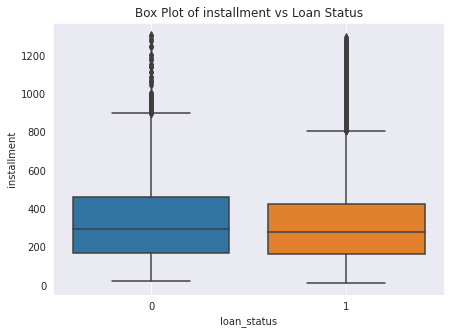

In [ ]:
num_plot('installment')

Similar to the installment, it is visible that the defaulters have installments in higher IQR than the fully paid borrowers, which can also be correlated to the higher interest rates. 

Hence, this factor also <font color="red">affects the loan status positively</font>.

8. Time Series Analysis

Now, let us check if the month and year of issue plays a role in the defaulting of loans. Let us start with our time series analysis.

In [ ]:
loan_new = loan_.copy()
loan_new['month'] = loan_new['issue_d'].str.split('-',n=1,expand=True)[0]
loan_new['year'] = (loan_new['issue_d'].str.split('-',n=1,expand=True)[1].astype(int)+2000).astype(str)

loan_new[['year','month']]

,year,month
0,2011,Dec
1,2011,Dec
2,2011,Dec
3,2011,Dec
5,2011,Dec
...,...,...
39712,2007,Jul
39713,2007,Jul
39714,2007,Jul
39715,2007,Jul


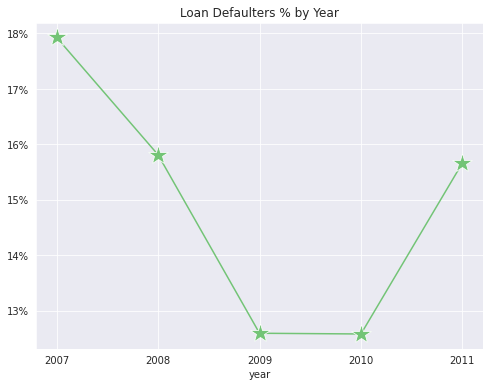

In [ ]:
defaulter_by_year = (1 - loan_new.groupby(['year']).mean()[['loan_status']])*100

cb.set_style('darkgrid')
plot.subplots(figsize=(8,6))
plot.title('Loan Defaulters % by Year')
cb.lineplot(data = defaulter_by_year, legend=None,marker='*',markersize = 20, palette = 'Greens')
plot.yticks(ticks = [i for i in range(13,19)], labels = ['{}%'.format(i) for i in range(13,19)])
plot.show()

We can see that the defaulter rate has suddenly increased in 2011, after continuously decreasing for 4 years. Let us check the same for the month as well. 

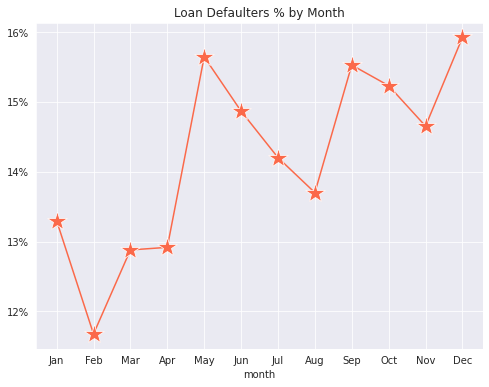

In [ ]:
defaulter_by_month = (1 - loan_new.groupby(['month']).mean()[['loan_status']])*100
defaulter_by_month.reset_index(inplace=True)

defaulter_by_month['month num'] = [4,8,12,2,1,7,6,3,5,11,10,9]
def_mon = defaulter_by_month.sort_values(by = 'month num').set_index('month')[['loan_status']]

cb.set_style('darkgrid')
plot.subplots(figsize=(8,6))
plot.title('Loan Defaulters % by Month')
cb.lineplot(data = def_mon,legend=None, palette = 'Reds', marker='*', markersize=20)
plot.yticks(ticks=[i for i in range(12,17)],labels=['{}%'.format(i) for i in range(12,17)])
plot.show()

We can see some drastic jumps here, between the months April to May (3% jump), and August to September (more than 2% jump). Hence, the <font color='red'>month and year of loan issue</font> can affect the defaulters. 

Now, let us plot some multi-variate analysis as well.

## Multi Variate Analysis

Now, we will start with multi-variate analysis for 2 or 3 variables. let us look at the month and year in combination from each other.

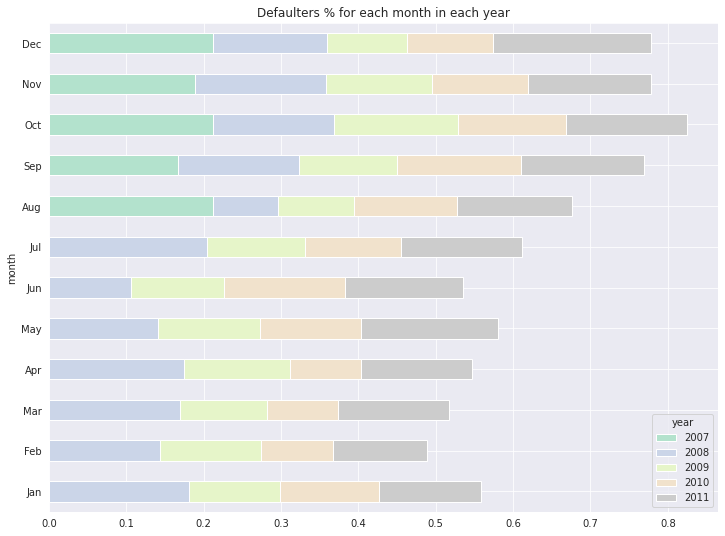

In [ ]:
month_and_year = 1 - loan_new.pivot_table(index = 'month', columns = 'year', values ='loan_status', aggfunc = np.mean)
month_and_year['month num'] = [4,8,12,2,1,7,6,3,5,11,10,9]
fin_my = month_and_year.sort_values(by = 'month num').iloc[:,:-1]

fin_my.plot(kind = 'barh', figsize=(12,9), stacked=True, cmap='Pastel2', 
            title = 'Defaulters % for each month in each year')
plot.show()

We can see that the year 2011 has seen significant rise in the number of defaulters, in all months. For all the other years besides it, the trend is somewhat neutral.

Now, let us look at the top 5 purposes for borrowing the loan. 

In [ ]:
top5purpose = loan_new[loan_new.purpose.isin([i[0] for i in loan_new[['purpose']].value_counts().head(5).index])]
top5purpose.head()

,recoveries,dti,open_acc,application_type,delinq_2yrs,emp_title,chargeoff_within_12_mths,purpose,annual_inc,last_credit_pull_d,...,tax_liens,title,out_prncp_inv,loan_amnt,total_acc,revol_bal,member_id,out_prncp,month,year
0,0.00,27.65,3,INDIVIDUAL,0,NaN,0.0,credit_card,24000.0,May-16,...,0.0,Computer,0.0,5000,9,13648,1296599,0.0,Dec,2011
3,0.00,20.00,10,INDIVIDUAL,0,AIR RESOURCES BOARD,0.0,other,49200.0,Apr-16,...,0.0,personel,0.0,10000,37,5598,1277178,0.0,Dec,2011
6,0.00,23.51,7,INDIVIDUAL,0,Southern Star Photography,0.0,debt_consolidation,47004.0,May-16,...,0.0,Loan,0.0,7000,11,17726,1304742,0.0,Dec,2011
9,269.29,18.08,2,INDIVIDUAL,0,Starbucks,0.0,other,15000.0,Mar-13,...,0.0,Building my credit history.,0.0,5375,3,9279,1306721,0.0,Dec,2011
10,0.00,16.12,14,INDIVIDUAL,0,Southwest Rural metro,0.0,debt_consolidation,72000.0,Dec-15,...,0.0,High intrest Consolidation,0.0,6500,23,4032,1305201,0.0,Dec,2011


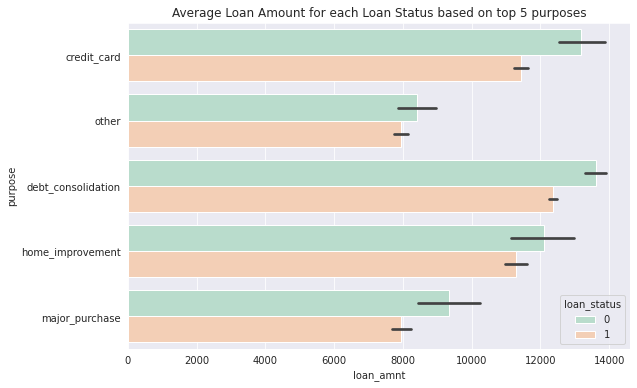

In [ ]:
plot.subplots(figsize=(9,6))
cb.barplot(x = 'loan_amnt', y = 'purpose', hue ='loan_status', data = top5purpose, palette = 'Pastel2', estimator = np.mean)
plot.title('Average Loan Amount for each Loan Status based on top 5 purposes')
plot.show()

It is clearly visible that purpose influences the defaulter rates. For each category in the top 5, the defaulters have more loan amount than the fully paid ones. 

Although this may not seem significant, but it is, when we consider the size of the data. Let us see the same for home ownership with annual income. 

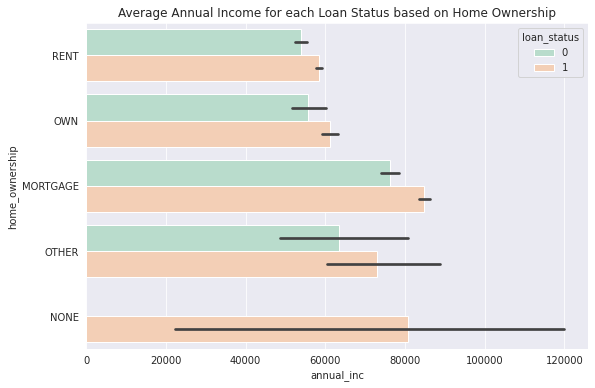

In [ ]:
plot.subplots(figsize=(9,6))
cb.barplot(x = 'annual_inc', y = 'home_ownership', hue ='loan_status', data = loan_new, palette = 'Pastel2', estimator = np.mean)
plot.title('Average Annual Income for each Loan Status based on Home Ownership')
plot.show()

We can see that as the annual income increases, the defaulter rates increase steadily in almost each category of the home ownership. Let us now look at the debt to income ratio (DTI) and the tenure (term) of the loan.

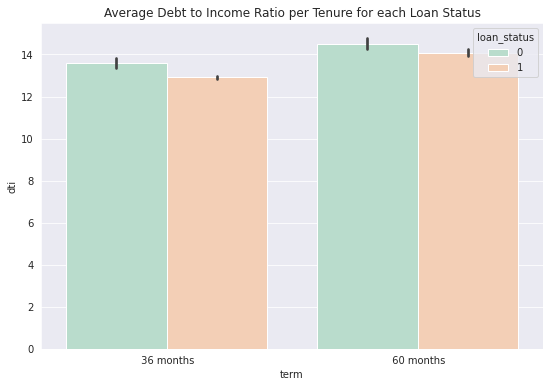

In [ ]:
plot.subplots(figsize=(9,6))
cb.barplot(x = 'term', y = 'dti', hue ='loan_status', data = loan_new, palette = 'Pastel2', estimator = np.mean)
plot.title('Average Debt to Income Ratio per Tenure for each Loan Status')
plot.show()

We can see that there is not any significant difference, when we combine the two columns. Next, let us combine the DTI with the employment time. 

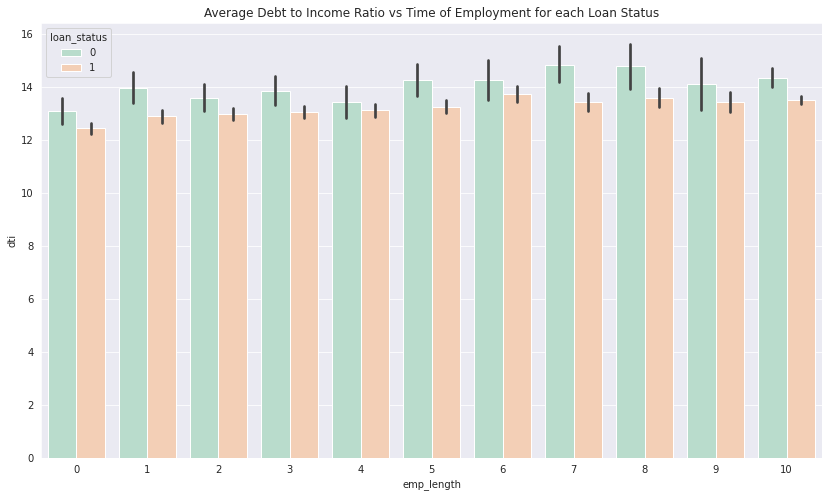

In [ ]:
plot.subplots(figsize=(14,8))
cb.barplot(x = 'emp_length', y = 'dti', hue ='loan_status', data = loan_new, palette = 'Pastel2', estimator = np.mean)
plot.title('Average Debt to Income Ratio vs Time of Employment for each Loan Status')
plot.show()

In this case as well, there is not much significant difference, apart from the noticeable pattern that defaulters are more than fully paid borrowers for every category. Let us see the relation between grade and funded amount now.

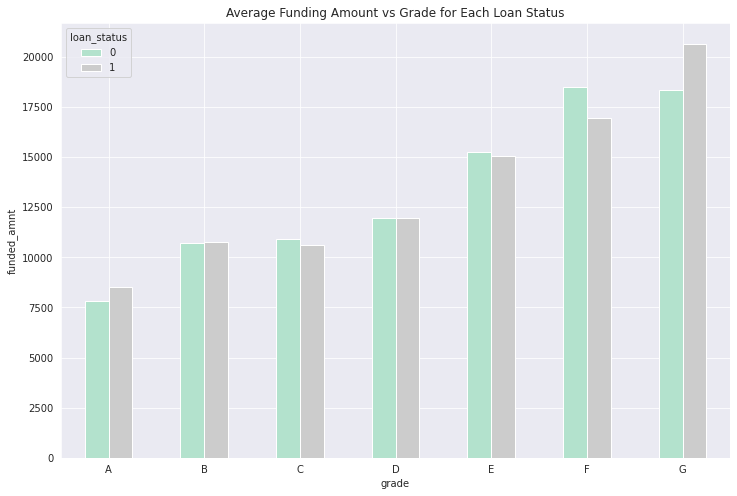

In [ ]:
loan_new.pivot_table(index = 'grade', columns = 'loan_status', values='funded_amnt', aggfunc = np.mean).plot(
    kind = 'bar', figsize=(12,8),cmap='Pastel2')
plot.ylabel('funded_amnt')
plot.title('Average Funding Amount vs Grade for Each Loan Status')
plot.xticks(rotation=0)
plot.show()

It is easily visible that there is an increasing trend as we move from Grade A to Grade G, and the average funding amount also increases with grade. So, it can be considered as an influencing factor.

Now, for the top 5 purposes, let us compare them with the home ownership on the basis of defaulter rates. Let us see now.

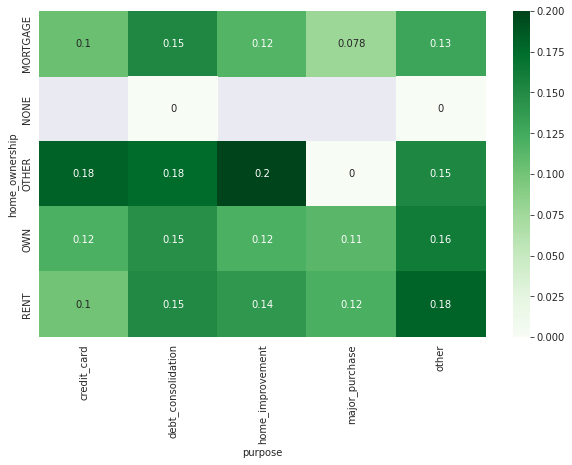

In [ ]:
df_by_purpose = 1 - top5purpose.pivot_table(index = 'home_ownership', columns = 'purpose', values='loan_status', aggfunc = np.mean)
plot.subplots(figsize=(10,6))
cb.heatmap(df_by_purpose, cmap = 'Greens', annot=True)
plot.show()

We can clearly see that there are some categories that when combined, influences the defaulter rates. 

Let us see the variation of default rate across each category in a categorical variable. We will define a function to perform this on all the categorical columns. 

In [ ]:
def dr_by_cat(cat_col):
  cat = (1 - loan_new.groupby(cat_col).mean()[['loan_status']])*100
  cat.sort_values(by='loan_status',inplace=True)
  diff = [(cat.values[i][0]/cat.values[i-1][0])-1 if cat.values[i-1][0]!=0 and i!=0 else 0 for i in range(len(cat.values))]
  cat['runn_diff']=np.array(diff)*100
  display(cat)

In [ ]:
dr_by_cat('home_ownership')

,loan_status,runn_diff
home_ownership,,
NONE,0.000000,0.000000
MORTGAGE,13.528171,0.000000
OWN,14.440433,6.743425
RENT,15.134418,4.805841
OTHER,18.367347,21.361439


In [ ]:
dr_by_cat('verification_status')

,loan_status,runn_diff
verification_status,,
Not Verified,12.587541,0.000000
Source Verified,14.704024,16.814103
Verified,16.598709,12.885488


In [ ]:
dr_by_cat('grade')

,loan_status,runn_diff
grade,,
A,5.776398,0.000000
B,11.928867,106.510493
C,16.794889,40.791984
D,21.791524,29.750932
E,26.717557,22.605270
F,32.638165,22.159988
G,33.557047,2.815361


In [ ]:
dr_by_cat('purpose')

,loan_status,runn_diff
purpose,,
wedding,10.076670,0.000000
major_purchase,10.144231,0.670464
credit_card,10.410288,2.622742
car,10.704420,2.825398
home_improvement,11.849192,10.694388
vacation,14.367816,21.255660
debt_consolidation,15.157001,5.492730
moving,15.217391,0.398429
medical,15.396341,1.175958


Our analysis is done. Based on this analysis, we have shortlisted 'x' parameters that affect the defaulting of a loan or not. These are -

- verification_status
- debt to income ratio (dti)
- public bankruptcy records
- tenure
- grades and sub-grades
- loan amount
- interest rate
- installments
- date of issue
- purpose 
- annual income
- home ownership
- funded_amnt

Based on the analysis, let us write some conclusions and recommendations now. 

# Conclusions and Recommendations

## Conclusions

On the basis of our data analysis, we can conclude the following - 

1. There are total __13 parameters__, out of 111, that influence the defaulter rates in a significant way. This is just around 10% of the total parameters !
2. Out of these parameters, there are some parameters that directly affect the defaulter rates, whereas some parameters, when combined with other parameters, affect them. 
3. The standalone parameters that influence the defaulter rates are - __home ownership__, __public bankruptcy records__, __debt to income ratio__, __verification status__, __annual income__, __grades and subgrades__, __tenure (term of loan)__, __loan amount__, __interest rate__ and __installments__. 
4. The parameters that affect by combinations are - __issue date__ (month with year), __purpose__ with __home ownership__, __average funding amount__ with __grade__, and __annual income__ with __home ownership__.

## Recommendations

On the basis of our Conclusions, the recommendations to the Lending Club are - 

1. There are __many parameters that are not even needed__ for our analysis, at least in this context. __Removing them__ from this particular data set will go a long way in making things easier for analysis.
2. Most of the __standalone parameters have a positive effect__ on the defaulter rates, i.e. when they increase, the defaulter rates also increase. __Controlling them to the best limit possible__ will help in reducing the credit loss. 
3. The __combinator parameters__ need to be studied some more to properly understand how they are exactly affecting the defaulter rates, and __have to be controlled / optimized__ accordingly.

Thank you, 

Yash Jain